In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from transform_factory import resize_322, center_crop_224, tensorize, get_spatial_transform, get_color_transform, imagenet_normalize
from logger import Logger
from tqdm import tqdm
from PIL import Image
from utils import set_seed
from torchvision.transforms.functional import to_pil_image

In [27]:
# img_path = "/home/juhyeon/Imagenet/train/n01443537/n01443537_605.JPEG"

# img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_18.JPEG"
img_path = "/home/juhyeon/Imagenet/train/n02100236/n02100236_390.JPEG"


orig_img = resize_322(Image.open(img_path))
np_orig_img = np.array(orig_img)

T_spatial, T_inv_spatial = get_spatial_transform()
T_color = get_color_transform()
color_transformed = T_color(orig_img)

np_color_transformed = np.array(color_transformed)

# print(np_orig_img.min(), np_orig_img.max(), np_orig_img.mean())
# print(np_color_transformed.min(), np_color_transformed.max(), np_color_transformed.mean())

spatial_transformed = T_spatial(imagenet_normalize(tensorize(orig_img)))
center_crop_224(spatial_transformed)

color_transformed = imagenet_normalize(tensorize(T_color(orig_img)))

normalized = imagenet_normalize(tensorize(orig_img))

transformed_img1 = imagenet_normalize(tensorize(T_spatial(T_color(orig_img))))
# transformed_img2 = T_spatial(imagenet_normalize(tensorize(T_color(orig_img))))
# transformed_img3 = T_spatial(T_color(imagenet_normalize(tensorize(orig_img))))
transformed_img4 = imagenet_normalize(T_spatial(T_color(tensorize(orig_img))))
transformed_img5 = imagenet_normalize(tensorize(T_color(T_spatial(orig_img))))

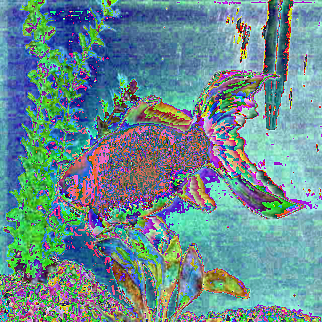

In [3]:
to_pil_image(color_transformed)

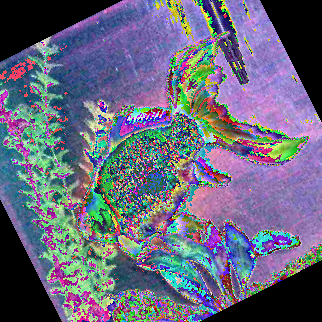

In [4]:
to_pil_image(spatial_transformed)

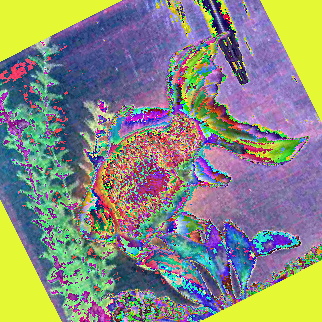

In [23]:
to_pil_image(transformed_img5)

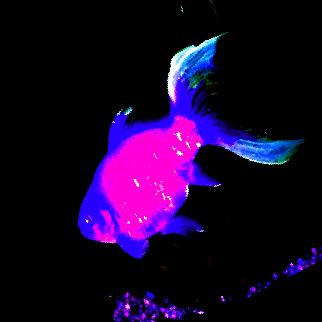

In [24]:
to_pil_image(transformed_img3)

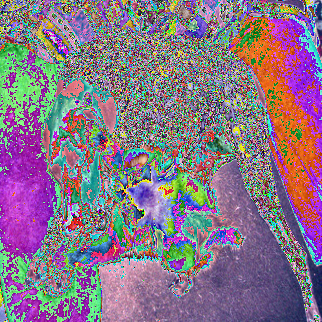

In [28]:
to_pil_image(normalized)

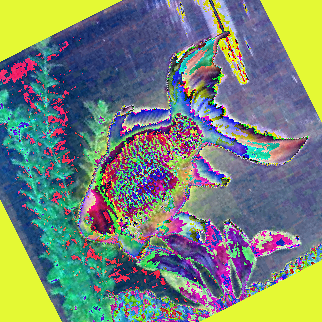

In [8]:
to_pil_image(transformed_img1)

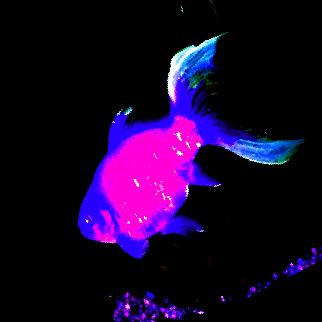

In [9]:
to_pil_image(transformed_img3)

In [10]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np

from PIL import Image
from transform_factory import resize_322, center_crop_224, imagenet_normalize, tensorize, get_spatial_transform, get_color_transform
from torchvision import transforms
from expl import ExplFactory
from captum.attr import visualization as viz
from torchvision.models import resnet50, ResNet50_Weights

In [11]:
model = resnet50(weights = ResNet50_Weights.DEFAULT).eval().cuda()

expl_method = "GradCAM"
expl_func = ExplFactory().get_explainer(model = model, expl_method = expl_method)

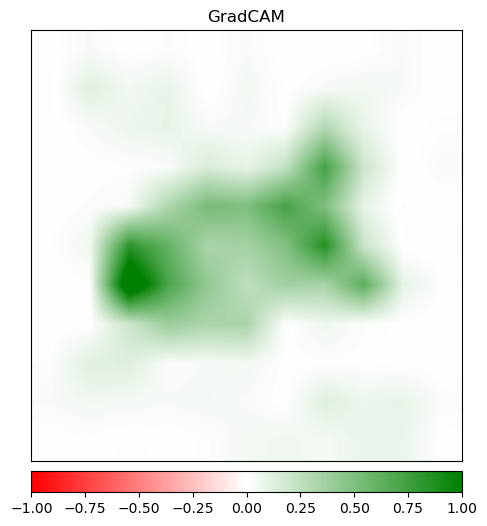

In [19]:
attr = expl_func(imagenet_normalize(tensorize(orig_img)).unsqueeze(0).cuda())
attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

_ = viz.visualize_image_attr(attr, np.transpose(imagenet_normalize(tensorize(orig_img)).squeeze().cpu().detach().numpy(), (1,2,0)), sign = 'all', show_colorbar=True, title = expl_method)

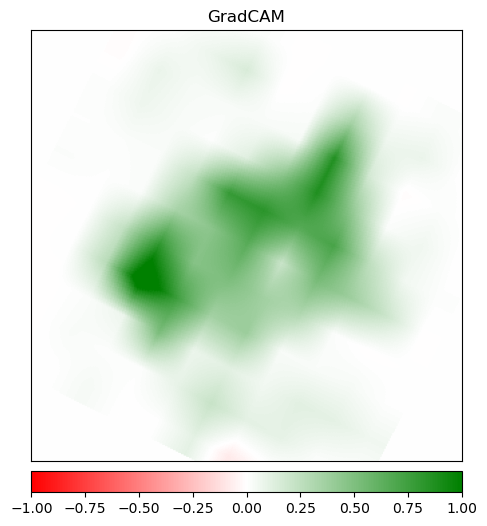

In [18]:
attr = expl_func(spatial_transformed.unsqueeze(0).cuda())
attr = T_inv_spatial(attr)
attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

_ = viz.visualize_image_attr(attr, np.transpose(imagenet_normalize(tensorize(orig_img)).squeeze().cpu().detach().numpy(), (1,2,0)), sign = 'all', show_colorbar=True, title = expl_method)

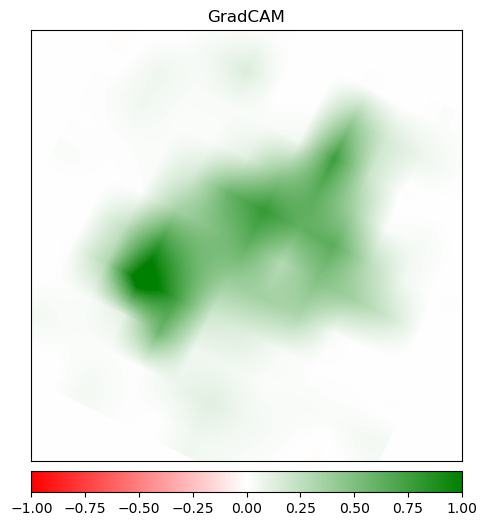

In [26]:
attr = expl_func(transformed_img5.unsqueeze(0).cuda())
attr = T_inv_spatial(attr)
attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

_ = viz.visualize_image_attr(attr, np.transpose(imagenet_normalize(tensorize(orig_img)).squeeze().cpu().detach().numpy(), (1,2,0)), sign = 'all', show_colorbar=True, title = expl_method)

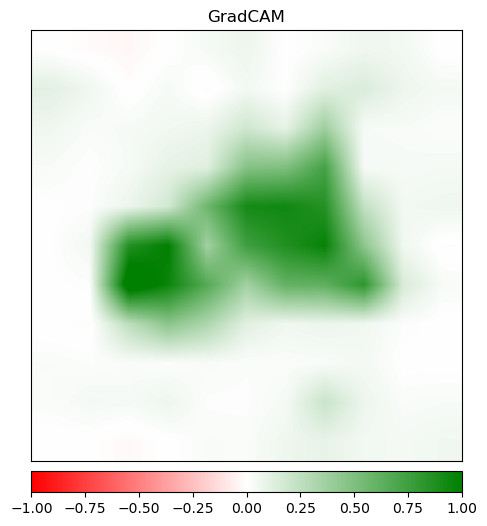

In [16]:
attr = expl_func(color_transformed.unsqueeze(0).cuda())
# attr = T_inv_spatial(attr)
attr = np.transpose(attr.squeeze(0).cpu().detach().numpy(), (1,2,0))

_ = viz.visualize_image_attr(attr, np.transpose(imagenet_normalize(tensorize(orig_img)).squeeze().cpu().detach().numpy(), (1,2,0)), sign = 'all', show_colorbar=True, title = expl_method)